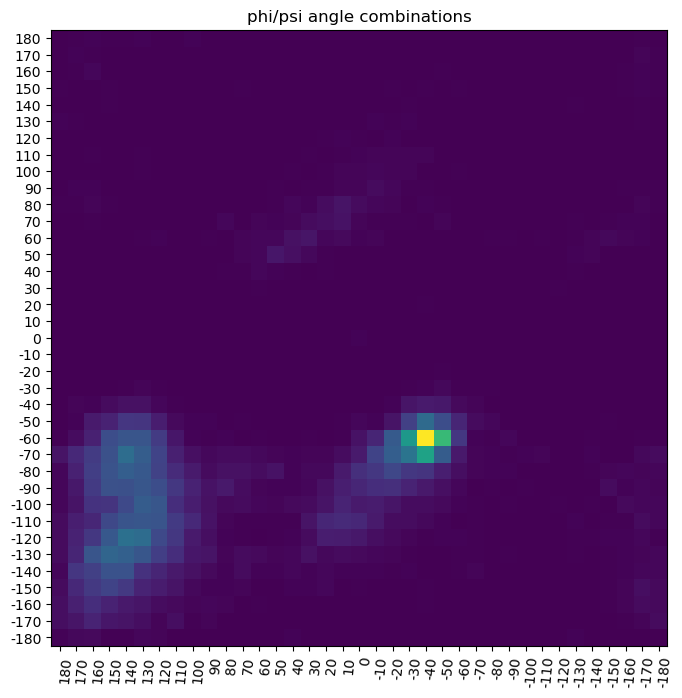

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

residues = pd.read_csv("./datasets/assignment3-data-1.csv")


# 1a
phi = residues['phi']
psi = residues['psi']

#plt.scatter(phi,psi)


data = np.zeros((37,37))
# count the occurances of each angle combination in terms
# 180 : 170 : 160 : 150 ... 0 : -10 : -20....
for phiv,psiv in zip(phi.tolist(),psi.tolist()):
    
    # Notes:
    # Kalkylera en index genom att 180 grader är först, dvs index 0 osv osv
    # Om de är 0 så vill vi att den ligger i mitten, dvs index 18 för den i mitten
    # 180 grader blir 18 så den ligger först, 50 grader blir 5 så den ligger på 13de plats
    # sen -180 blir 18 så den ska ligga sist med 18 + 18 = 36
    phir = round(phiv/10) 
    psir = round(psiv/10)
   
    phi_index = 0
    if phir == 0:
        phi_index = 18
    elif phir > 0:
        phi_index = 18 - phir
    elif phir < 0:
        phi_index = 18 + abs(phir)
        
    psi_index = 0
    if psir == 0:
        psi_index = 18
    elif psir > 0:
        psi_index = 18 - psir
    elif psir < 0:
        psi_index = 18 + abs(psir)
    #print(phi_index, psi_index, phir, psir)
    data[phi_index,psi_index] = data[phi_index,psi_index] + 1
   


fig, ax = plt.subplots()
im = ax.imshow(data)
label = []
for i in range(37):
    label.append("" + str(180 - i*10))

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(label)), labels=label)
ax.set_yticks(np.arange(len(label)), labels=label)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")


ax.set_title("phi/psi angle combinations")
fig.set_size_inches(15, 8)
plt.show()
# snott från https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html